# <font color=red>Chapter 7: Neural Networks</font>

### A <font color=green>neural network</font> is a multilayered regression containing layers of weights, biases, and nonlinear functions that reside between input variables and output variables. <font color=green>Deep learning</font> is a popular variant of neural networks that utilizes multiple “hidden” (or middle) layers of nodes containing weights and biases.
### Neural networks offer exciting solutions to problems previously difficult for computers to solve. From identifying objects in images to processing words in audio.

## <font color=red>When to Use Neural Networks and Deep Learning</font>
### Neural networks and deep learning can be used for classification and regression, so do linear regression, logistic regression, and other types of machine learning. There are advantages and disadvantages that are situational for each type of algorithm.</br> Linear regression and logistic regression do a pretty fantastic job making predictions on structured data. Think of structured data as data that is easily represented as a table, with rows and columns.</br>But perceptual problems like image classification are much less structured, as we are trying to find fuzzy correlations between groups of pixels to identify shapes and patterns, not rows of data in a table. Trying to predict the next four or five words in a sentence being typed, or deciphering the words being said in an audio clip, are also perceptual problems and examples of neural networks being used for natural language processing.
### Variants of neural networks include<font color=green>convolutional neural networks</font>, which are often used for image recognition. <font color=green>Long short-term memory (LSTM)</font> is used for predicting time series, or forecasting. <font color=green>Recurrent neural networks</font> are often used for text-to-speech applications.

## <font color=red>A Simple Neural Network</font>
### We want to predict whether a font should be light (1) or dark (0) for a given color background. </br>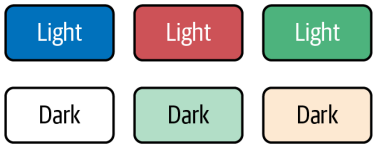

### From a machine learning and regression perspective, we have three numeric input variables red, green, and blue to capture a given background color. We need to fit a function to these input variables and output whether a light (1) or dark (0) font should be used for that background color. </br>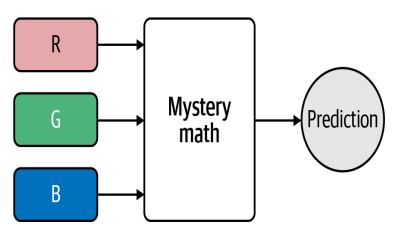

### This prediction output expresses a probability. Outputting probabilities is the most common model for classification with neural networks. Once we replace RGB with their numerical values, we see that less than 0.5 will suggest a dark font whereas greater than 0.5 will suggest a light font.

### So what is going on inside that mystery math black box?</br></br>The first layer on the left is simply an input of the three variables, which in this case are the red, green, and blue values.</br></br>In the hidden (middle) layer, notice that we produce three nodes, or functions of weights and biases, between the inputs and outputs. Each node essentially is a linear function with slopes Wi and intercepts Bi being multiplied and summed with input variables Xi . There is a weight Wi between each input node and hidden node.</br></br>and another set of weights between each hidden node and output node. Each hidden and output node gets an additional bias Bi added.Notice the output node repeats the same operation, taking the resulting weighted and summed outputs from the hidden layer and making them inputs into the final layer, where another set of weights and biases will be applied.</br>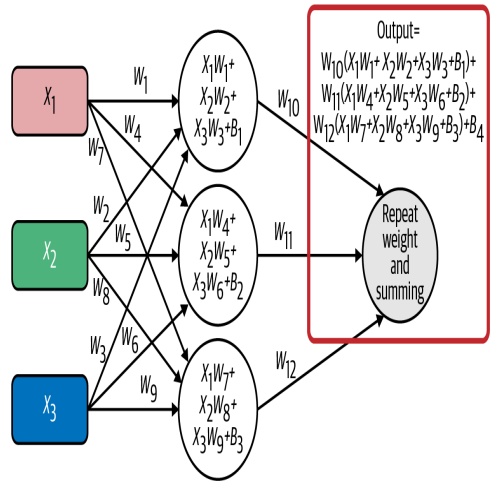

### <font color=green>Activation Functions</font>
### An activation function is a nonlinear function that transforms or compresses the weighted and summed values in a node, helping the neural network separate the data effectively so it can be classified. </br>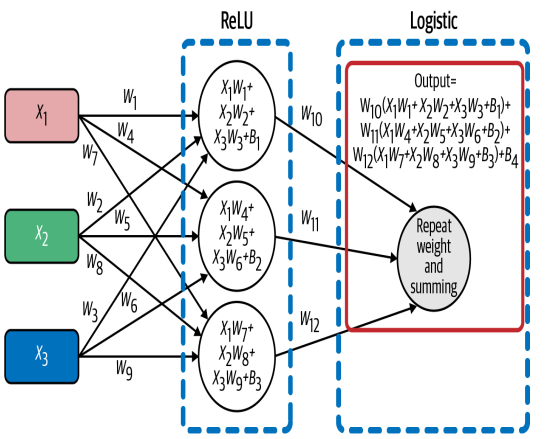

### The <font color=green>ReLU activation function</font> will zero out any negative outputs from the hidden nodes. If the weights, biases, and inputs multiply and sum to a negative number, it will be converted to 0. Otherwise the output is left alone. ReLU is short for <font color=green>rectified linear unit</font> but that is just a fancy way of saying “turn negative values into 0</br> 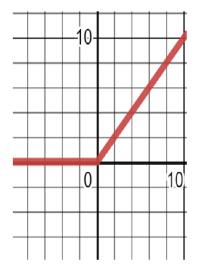

### The <font color=green>output layer</font> has an important job: it takes the piles of math from the hidden layers of the neural network and turns them into an interpretable result, such as presenting classification predictions. The output node weights, biases, and sums each of the incoming values from the hidden layer. After that, it passes the resulting value through another activation function (in this case sigmoid function which is good for output layer) so in this csae it outputs a number between 0 and 1 so If it is greater than or equal to 0.5, the neural network is suggesting a light font, but less than that will advise a dark font.

### some important activation functions : </br>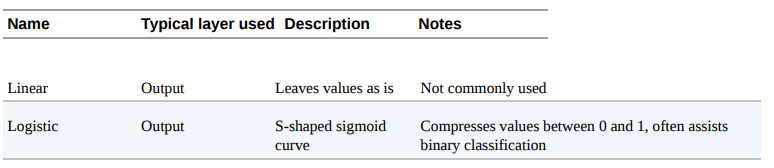
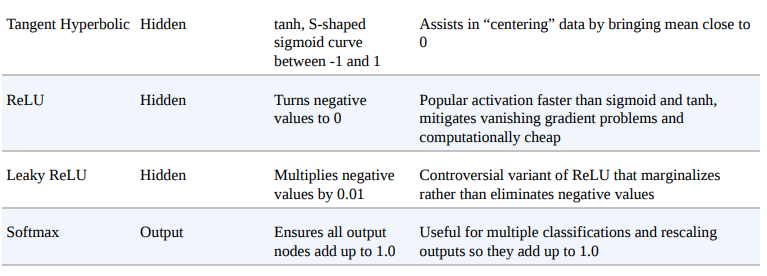

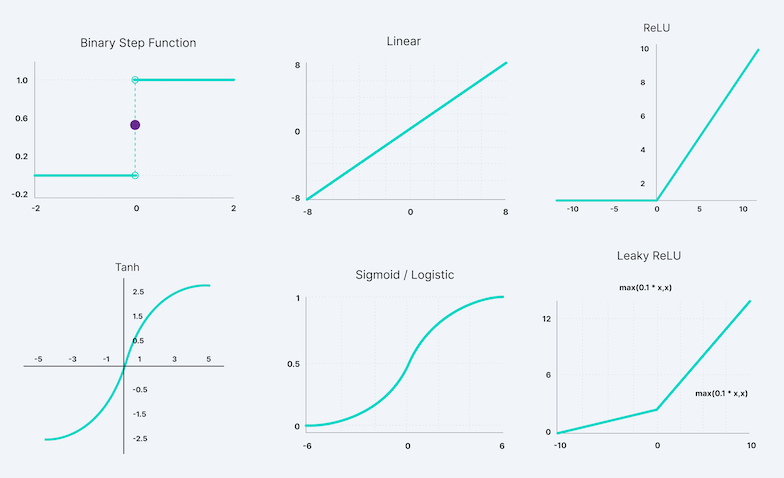

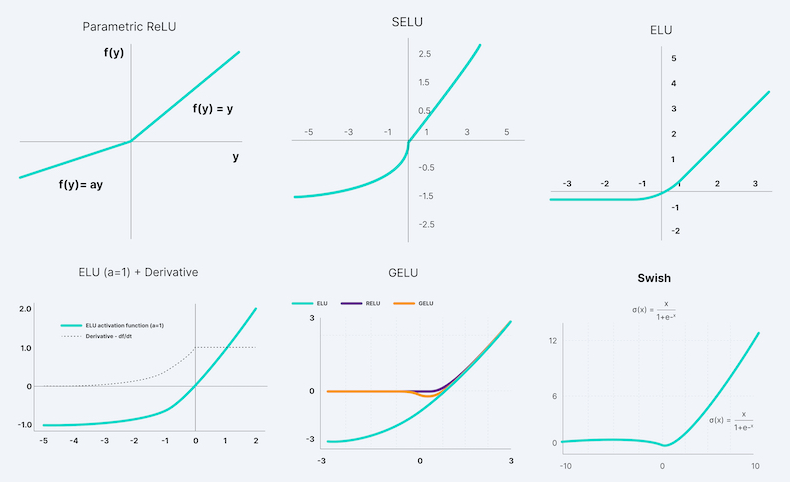

### If you wanted to support multiple classes, you could add more output nodes for each class. For instance, if you are trying to recognize handwritten digits 0–9, there would be 10 output nodes representing the probability a given image is each of those numbers. You might consider using softmax as the output activation when you have multiple classes as well.

### <font color=green>Forward Propagation</font>
### <font color=green>Feed forward</font> means we are simply inputting a color into the neural network and seeing what it outputs. The weights and biases are randomly initialized and will be optimized later.

### At first step, the weights and biases are going to be initialized as random values between 0 and 1 : </br>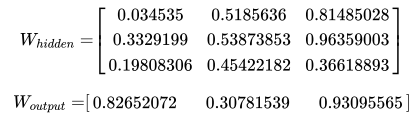
### Note that Whidden are the weights in the hidden layer. The first row represents the first node weights W1, W2, and W3. The second row is the second node with weights W4, W5, and W6. The third row is the third node with weights W7, W8, and W9. The output layer has only one node, meaning its matrix has only one row with weights W10, W11, and W12.  Each node is represented as a row in a matrix. If there are three nodes, there are three rows. If there is one node, there is one row. Each column holds a weight value for that node.
### Since there is one bias per node, there are going to be three rows of biases for the hidden layer and one row of biases for the output layer.</br>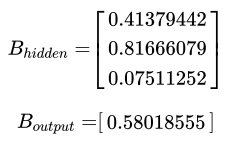

### so after first initialization, it is like this : </br>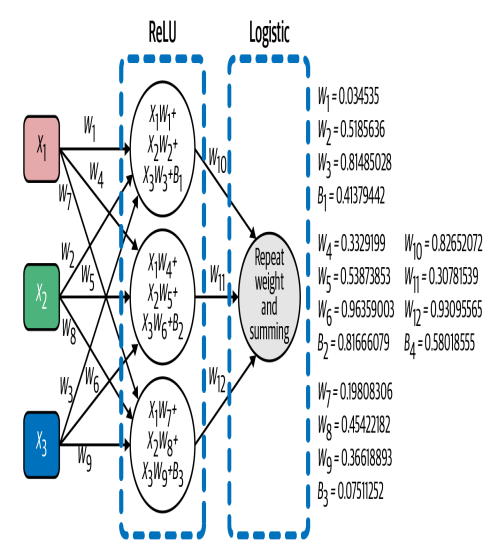

### now we declare the relu and logistic activation functions, which literally take a given input value and return the output value from the node. 
### Z1, A1, Z2, and A2. The “1” and “2” indicate the operations belong to layers 1 and 2 respectively. The “Z” indicates an unactivated output from the layer, and “A” is activated output from the layer. </br> 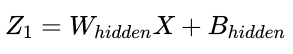</br>
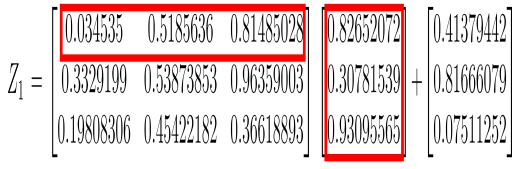

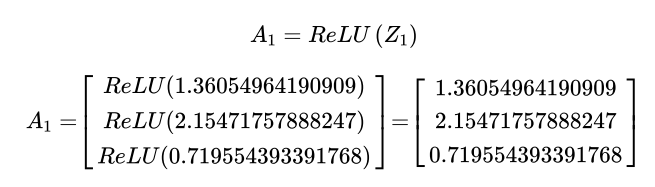

### Now hidden layer output A1 and pass it through the final layer to get Z2 and then A2. A1 becomes the input into the output layer.</br>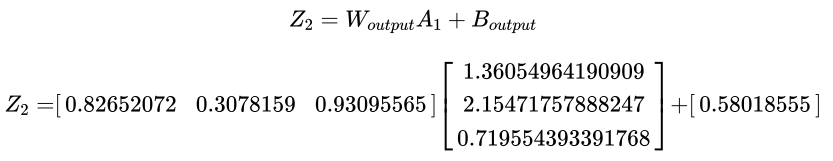

### 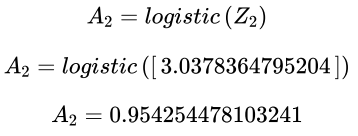
### A2 is the final output that makes a prediction whether that background color need a light 0 or dark 1 font.
### <font color=purple>Until know it was the basics of neural networks and our weights and biases have not been optimized yet. now lets optimize it :)</font>

### <font color=green> Backpropagation</font>
### Backpropagation is a process involved in training a neural network. It involves taking the error rate of a forward propagation and feeding this loss backward through the neural network layers to fine-tune the weights. Backpropagation is the essence of neural net training.
### <font color=blue>More about backpropagation on https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd.</font>

## <font color=red> Using scikit-learn</font>
### There is some limited neural network functionality in scikit-learn. If you are serious about deep learning, you will probably want to study <font color=green>PyTorch</font> or <font color=green>TensorFlow</font>.
### However, scikitlearn does have some convenient models available, including the <font color=green>MLPClassifier</font>, which stands for <font color=green>multi-layer perceptron classifier</font>. This is a neural network designed for classification, and it uses a logistic output activation by default.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('df.csv', delimiter=",")
X = (df.values[:, :-1] / 255.0) ;Y = df.values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',hidden_layer_sizes=(3, ),activation='relu',max_iter=100_000, learning_rate_init=.05)
nn.fit(X_train, Y_train)

print(nn.coefs_ ,"\n************")     #weights
print(nn.intercepts_ ,"\n************")                  #biases
print("Training set score: %f" % nn.score(X_train, Y_train))
print("Test set score: %f" % nn.score(X_test, Y_test))

[array([[-0.64626973,  3.61403783, -0.64293225],
       [-3.47841974,  6.09980034,  0.82066161],
       [ 0.15972563,  1.56271435, -0.73927571]]), array([[-4.67512026],
       [ 8.45177048],
       [ 0.24570183]])] 
************
[array([ 3.43851492, -4.55105067, -0.09592848]), array([-2.12012388])] 
************
Training set score: 0.996652
Test set score: 0.993318
